# **Day 2 - Lines**

Data Source: [HydroSHEDS](https://www.hydrosheds.org/products/hydrorivers)

## Setup

In [ ]:
!pip install geopandas shapely matplotlib

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.cm as cm
import matplotlib.colors as colors
from shapely.geometry import box
import urllib.request, zipfile
import warnings

## Data

In [ ]:
warnings.filterwarnings("ignore")

hydro_url = "https://data.hydrosheds.org/file/HydroRIVERS/HydroRIVERS_v10_as_shp.zip"
zip_path = "hydrorivers_asia.zip"

print("Downloading HydroRIVERS Asia")
urllib.request.urlretrieve(hydro_url, zip_path)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall("hydrorivers_asia")

print("HydroRIVERS extracted")

rivers = gpd.read_file("hydrorivers_asia/HydroRIVERS_v10_as_shp/HydroRIVERS_v10_as.shp")

HydroRIVERS extracted


In [ ]:
# Indian boundary
!wget -q https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip
!unzip -o ne_50m_admin_0_countries.zip -d countries > /dev/null

world = gpd.read_file("countries/ne_50m_admin_0_countries.shp")
india = world[world["ADMIN"] == "India"]

In [ ]:
# Indian rivers
india_4326 = india.to_crs("EPSG:4326")
rivers_india = gpd.clip(rivers, india_4326)

print("India river segments:", len(rivers_india))

India river segments: 255319


## Visualize

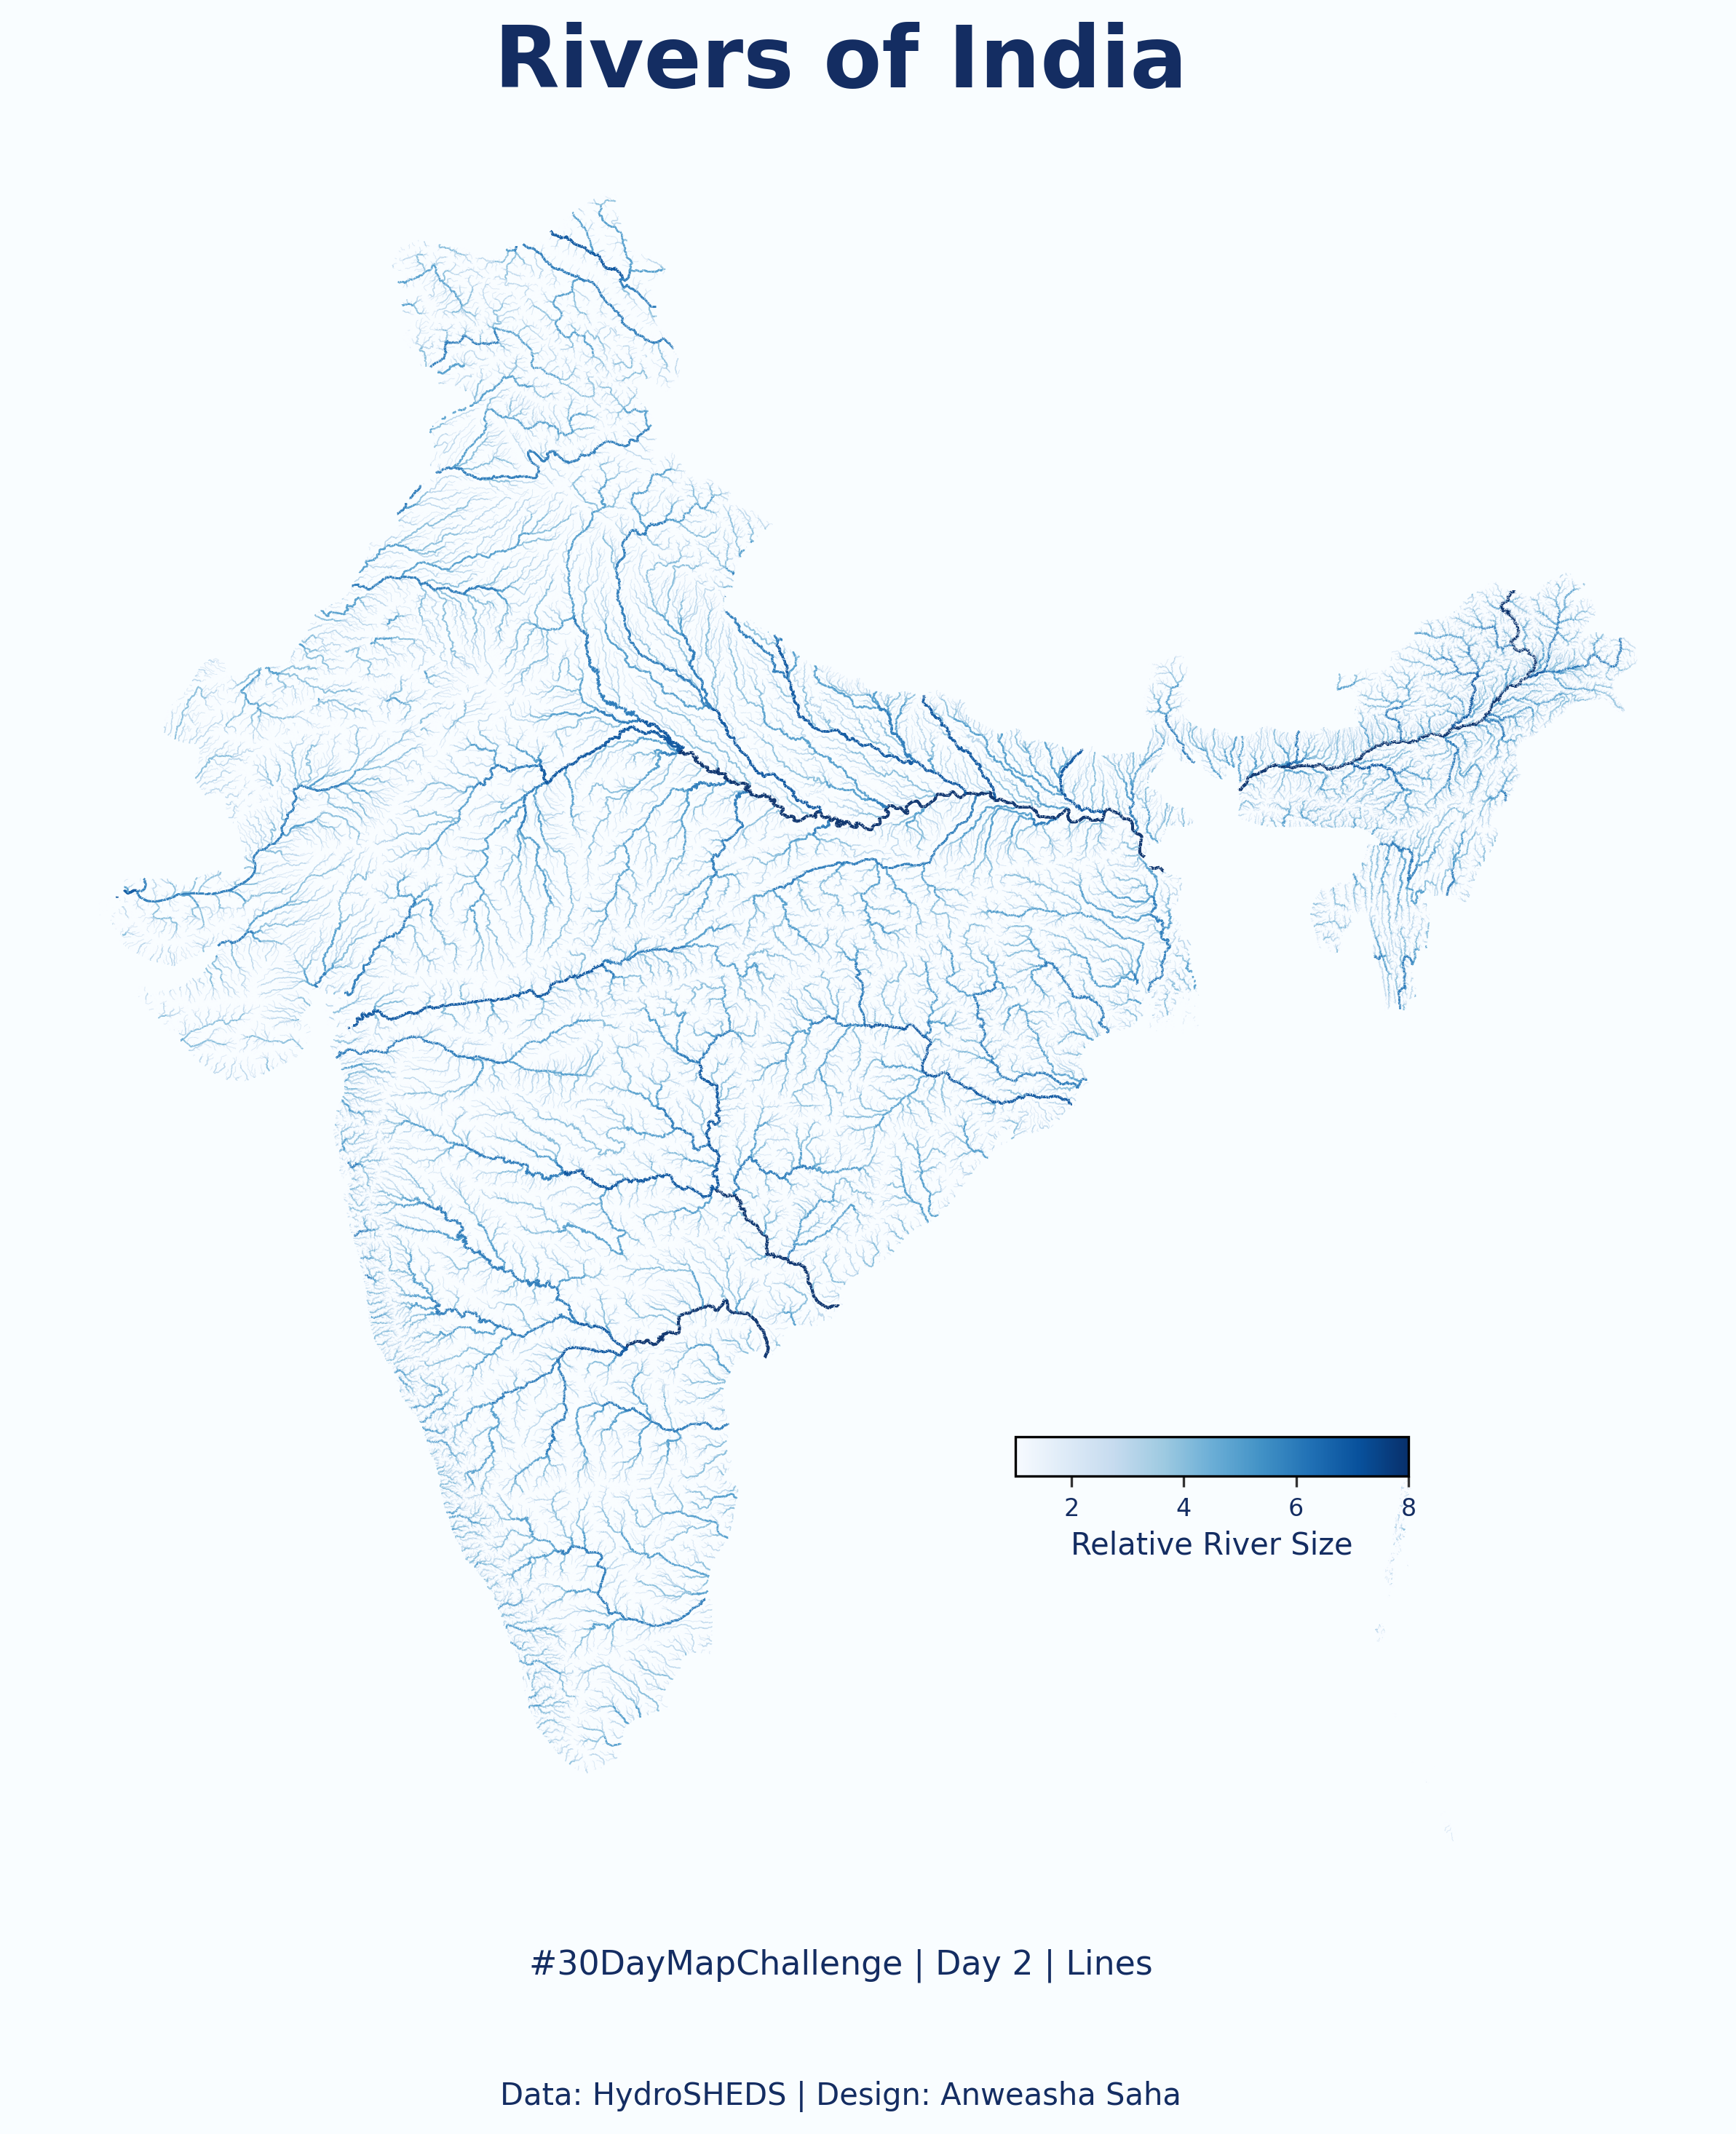

In [ ]:
norm = colors.Normalize(vmin=rivers_india["ORD_STRA"].min(), vmax=rivers_india["ORD_STRA"].max())

india_3857 = india_4326.to_crs(3857)
rivers_3857 = rivers_india.to_crs(3857)

fig, ax = plt.subplots(figsize=(10, 12), dpi=300)

# background
background_color = "#F9FDFF"
ax.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

rivers_3857.plot(
    ax=ax,
    linewidth=rivers_3857["ORD_STRA"] * 0.12,
    color=[cm.Blues(norm(v)) for v in rivers_3857["ORD_STRA"]],
    alpha=0.95, antialiased=True, zorder=4,
    path_effects=[pe.Stroke(linewidth=0.2, foreground="white", alpha=0.5), pe.Normal()]
)

ax.set_axis_off()

fig.text(0.5, 0.85, "Rivers of India", fontsize=28, fontweight="bold", ha="center", color="#142D62")

# legend
cax = fig.add_axes([0.58, 0.32, 0.18, 0.015])
cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap="Blues"), cax=cax, orientation="horizontal")

cb.set_label("Relative River Size", color="#142D62", fontsize=10, labelpad=3)

cb.ax.xaxis.set_tick_params(color="#333333")
plt.setp(plt.getp(cb.ax.axes, 'xticklabels'), color="#142D62", fontsize=8)

fig.text(0.5, 0.13, "#30DayMapChallenge | Day 2 | Lines", fontsize=11, ha="center", color="#142D62")

fig.text(0.5, 0.08, "Data: HydroSHEDS | Design: Anweasha Saha", fontsize=10, ha="center", color="#142D62")

plt.show()